Pearson's R-squared value for Lab: 0.9809989339639513


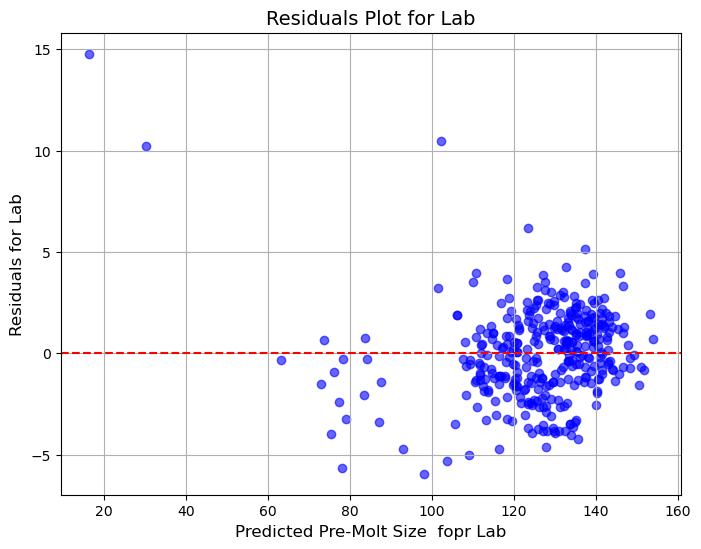

Skewness of Residuals for Lab: 1.0124432564966326
Kurtosis of Residuals for Lab: 6.000611992318094


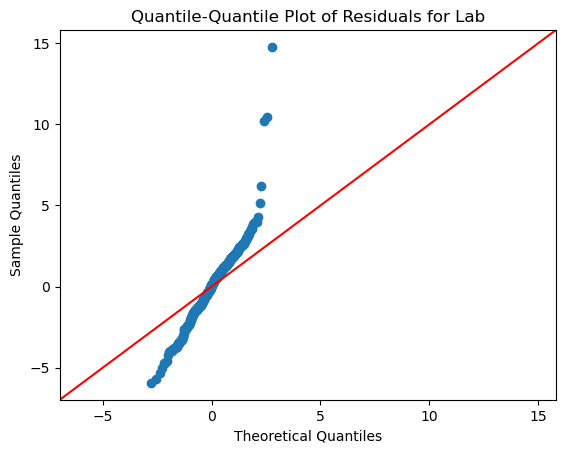

Kolmogorov-Smirnov Test for Lab: KstestResult(statistic=0.05440886644744647, pvalue=0.22717304496796087, statistic_location=2.2197586818164723, statistic_sign=1)
Anderson-Darling Test Statistic for Lab: 1.883114707153993
Critical Values for Lab: [0.57  0.649 0.779 0.908 1.08 ]
Significance Levels for Lab: [15.  10.   5.   2.5  1. ]
Cramér-von Mises Test for Lab: CramerVonMisesResult(statistic=5.446031614852244, pvalue=2.5447244311749273e-10)
Shapiro-Wilk Test for Lab: ShapiroResult(statistic=0.9337337952694837, pvalue=1.3760769946890272e-11)
Pearson's R-squared value for field: 0.9327747000533485


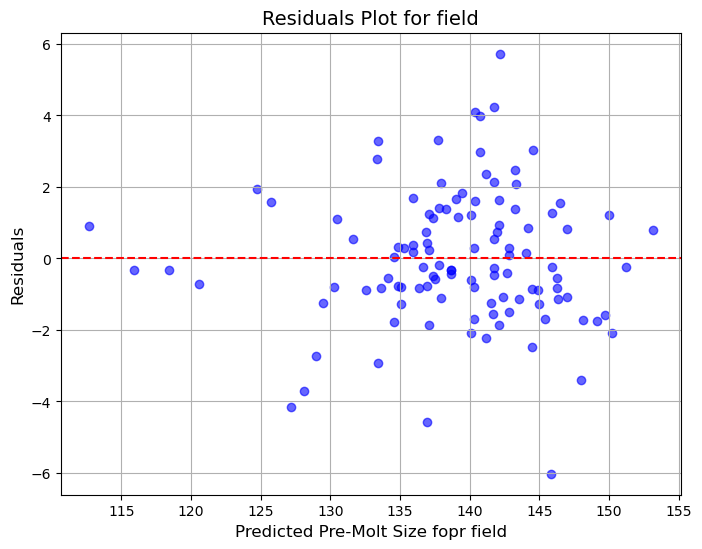

Skewness of Residuals for field: 0.035556233639723565
Kurtosis of Residuals for field: 0.9129150626627078


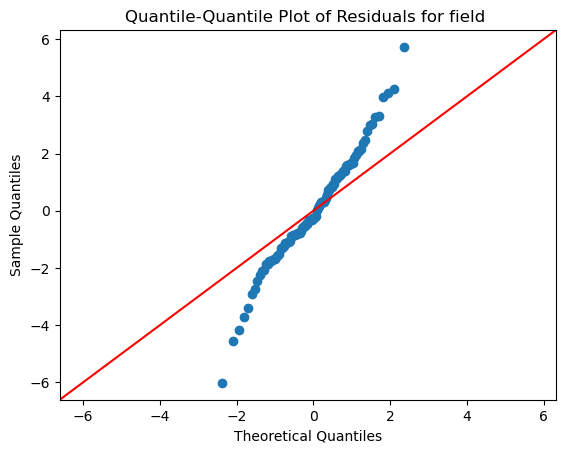

Kolmogorov-Smirnov Test for firld: KstestResult(statistic=0.07323211089619391, pvalue=0.5657889091756525, statistic_location=-0.19598975455565437, statistic_sign=1)
Anderson-Darling Test Statistic for field: 0.558274122267207
Critical Values for field: [0.557 0.634 0.761 0.888 1.056]
Significance Levels for field: [15.  10.   5.   2.5  1. ]
Cramér-von Mises Test for field: CramerVonMisesResult(statistic=1.0376018608285311, pvalue=0.0019464859623432584)
Shapiro-Wilk Test for field: ShapiroResult(statistic=0.9856511386768901, pvalue=0.2832637209743649)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, anderson, kstest, cramervonmises
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data from the stored file (mp2 - input.csv)
df = pd.read_csv('input.csv')

# Linear regression model (predicting pre-molt size from post-molt size)

X = df[df['Location'] == 'Lab'][['Post-molt']]
y = df[df['Location'] == 'Lab']['Pre-molt']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)
print(f"Pearson's R-squared value for Lab: {r_squared}")

# Predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot for Lab', fontsize=14)
plt.xlabel('Predicted Pre-Molt Size  fopr Lab', fontsize=12)
plt.ylabel('Residuals for Lab', fontsize=12)
plt.grid(True)
plt.show()

# Skewness and Kurtosis of residuals
residuals_skew = skew(residuals)
residuals_kurtosis = kurtosis(residuals)
print(f'Skewness of Residuals for Lab: {residuals_skew}')
print(f'Kurtosis of Residuals for Lab: {residuals_kurtosis}')

# Quantile plot of residuals (Q-Q plot)
sm.qqplot(residuals, line='45')
plt.title('Quantile-Quantile Plot of Residuals for Lab')
plt.show()

# Kolmogorov-Smirnov test for normality
ks_test = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'Kolmogorov-Smirnov Test for Lab: {ks_test}')

# Anderson-Darling test for normality
anderson_result = anderson(residuals)
print(f'Anderson-Darling Test Statistic for Lab: {anderson_result.statistic}')
print(f'Critical Values for Lab: {anderson_result.critical_values}')
print(f'Significance Levels for Lab: {anderson_result.significance_level}')

# Cramér-von Mises test for normality
cvm_result = cramervonmises(residuals, 'norm')
print(f'Cramér-von Mises Test for Lab: {cvm_result}')

# Shapiro-Wilk test for normality
shapiro_result = shapiro(residuals)
print(f'Shapiro-Wilk Test for Lab: {shapiro_result}')




X = df[df['Location'] == 'Field'][['Post-molt']]
y = df[df['Location'] == 'Field']['Pre-molt']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)
print(f"Pearson's R-squared value for field: {r_squared}")

# Predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot for field', fontsize=14)
plt.xlabel('Predicted Pre-Molt Size fopr field', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

# Skewness and Kurtosis of residuals
residuals_skew = skew(residuals)
residuals_kurtosis = kurtosis(residuals)
print(f'Skewness of Residuals for field: {residuals_skew}')
print(f'Kurtosis of Residuals for field: {residuals_kurtosis}')

# Quantile plot of residuals (Q-Q plot)
sm.qqplot(residuals, line='45')
plt.title('Quantile-Quantile Plot of Residuals for field ')
plt.show()

# Kolmogorov-Smirnov test for normality
ks_test = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'Kolmogorov-Smirnov Test for firld: {ks_test}')

# Anderson-Darling test for normality
anderson_result = anderson(residuals)
print(f'Anderson-Darling Test Statistic for field: {anderson_result.statistic}')
print(f'Critical Values for field: {anderson_result.critical_values}')
print(f'Significance Levels for field: {anderson_result.significance_level}')

# Cramér-von Mises test for normality
cvm_result = cramervonmises(residuals, 'norm')
print(f'Cramér-von Mises Test for field: {cvm_result}')

# Shapiro-Wilk test for normality
shapiro_result = shapiro(residuals)
print(f'Shapiro-Wilk Test for field: {shapiro_result}')

